In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cv_utils import *

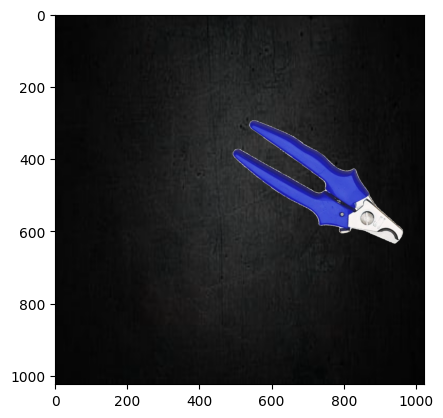

In [2]:
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_0.jpg"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\expand_labelled_dataset\1\6020021301_0.jpg"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_mdg5.png"
img = cv2.imread(image_path)
padding = 100
#img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(255, 255, 0))
plt.imshow(img)

In [3]:
img.shape

(1024, 1024, 3)

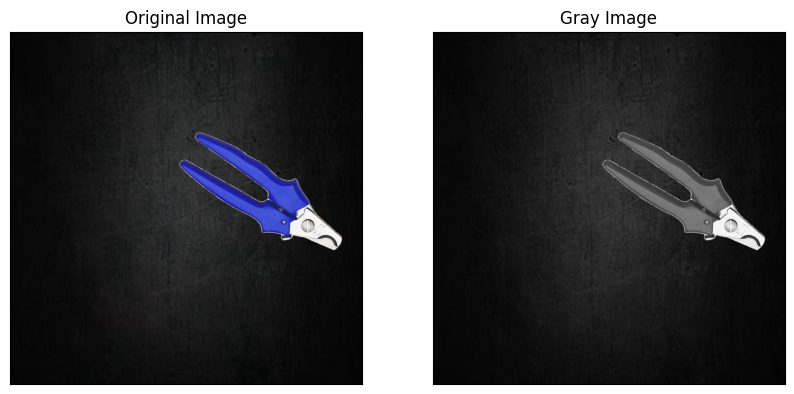

In [4]:
image = cv2.imread(image_path)
#image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(255, 255, 255))
grey = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
blurred = cv2.GaussianBlur(grey, (5, 5), 0)
edges = cv2.Canny(blurred, 0, 0)
plt.figure(figsize = (10, 8))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(grey, cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.show()

v = 18.0, lower = 12, upper = 23


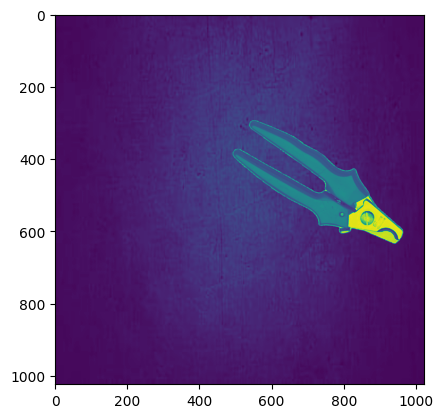

In [5]:
sigma = 0.33
v = np.median(image)
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
print(f"v = {v}, lower = {lower}, upper = {upper}")
plt.imshow(grey)

In [6]:
image = cv2.imread(image_path)
#image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(255, 255, 255))
raw_image = remove_noise(image)

grey = cv2.cvtColor(raw_image, cv2.COLOR_BGRA2GRAY)
_, binary_image = cv2.threshold(grey, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours[0]

array([[[937, 606]],

       [[938, 607]]], dtype=int32)

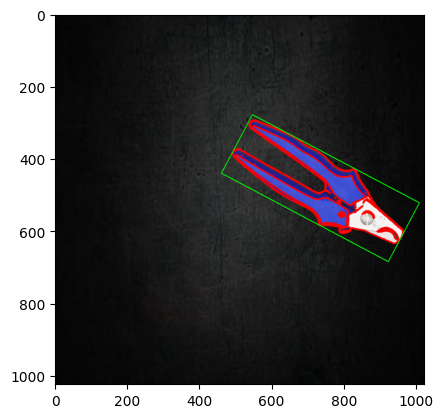

In [7]:
contour_img = []
contour_img = cv2.drawContours(image, contours, -1, 255, 3)
biggest_contour = max(contours, key = cv2.contourArea)
rect_color = (0, 255, 0) # Green
font = 5
image_copy = image.copy()
result_image = draw_rotated_rectangle(image_copy, biggest_contour, rect_color, font)
plt.imshow(result_image)

In [8]:
len(contours)

128

In [9]:
len(biggest_contour)

1553

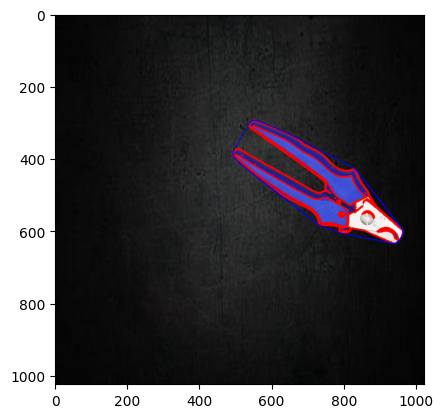

In [14]:
temp_img = image.copy()
hull = cv2.convexHull(biggest_contour)
cv2.polylines(temp_img, [hull], True, (0,0,255), 2)
plt.imshow(temp_img)

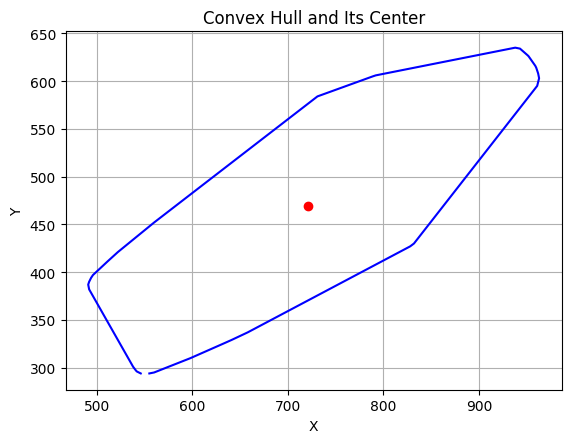

In [11]:
cx, cy = find_hull_center(hull)

# Plot the convex hull and its center
plt.figure()
plt.plot(hull[:, 0, 0], hull[:, 0, 1], c='blue')  # Plot convex hull
plt.scatter(cx, cy, c='red', marker='o')         # Plot center of convex hull
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull and Its Center')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

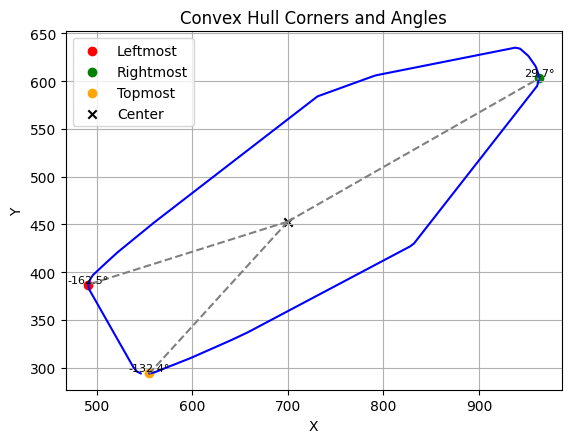

In [12]:
leftmost, rightmost, topmost = find_hull_corners(hull)

# Calculate the center of the hull
center_x = int(np.mean(hull[:, :, 0]))
center_y = int(np.mean(hull[:, :, 1]))
center = (center_x, center_y)

# Plot the convex hull and its corners
plt.figure()
plt.plot(hull[:, 0, 0], hull[:, 0, 1], c='blue')  # Plot convex hull
plt.scatter(*leftmost, c='red', marker='o', label='Leftmost')   # Plot leftmost corner
plt.scatter(*rightmost, c='green', marker='o', label='Rightmost')  # Plot rightmost corner
plt.scatter(*topmost, c='orange', marker='o', label='Topmost')  # Plot topmost corner

# Draw lines from center to corners and annotate with angle values
for corner, label in zip([leftmost, rightmost, topmost], ['Left', 'Right', 'Top']):
    plt.plot([center[0], corner[0]], [center[1], corner[1]], linestyle='--', color='gray')  # Draw line
    angle_deg = calculate_angle(center, corner)
    plt.text(corner[0], corner[1], f'{angle_deg:.1f}°', fontsize=8, ha='center', va='bottom')  # Annotate angle value

plt.scatter(*center, c='black', marker='x', label='Center')  # Plot center of the hull
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull Corners and Angles')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()

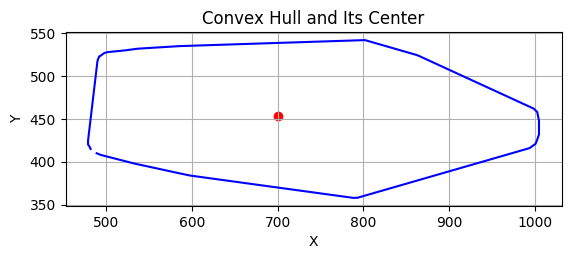

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_hull_center(hull):
    # Compute the centroid of the convex hull
    M = cv2.moments(hull)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    return cx, cy

def rotate_to_horizontal(hull):
    # Get the orientation angle of the hull
    angle = np.arctan2(hull[:, 0, 1].max() - hull[:, 0, 1].min(), hull[:, 0, 0].max() - hull[:, 0, 0].min()) * 180 / np.pi

    # Rotate the hull to align with the longest side along the x-axis
    center = (np.mean(hull[:, :, 0]), np.mean(hull[:, :, 1]))  # Center of the hull
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated_hull = cv2.transform(hull.reshape(-1, 1, 2), rotation_matrix)

    return rotated_hull.reshape(-1, 2), center

def plot_hull_and_center(hull, center):
    plt.figure()
    plt.plot(hull[:, 0], hull[:, 1], c='blue')  # Plot convex hull
    plt.scatter(center[0], center[1], c='red', marker='o')  # Plot center of convex hull
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull and Its Center')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming 'hull' is the convex hull
rotated_hull, center = rotate_to_horizontal(hull)

# Plot the rotated convex hull and its center
plot_hull_and_center(rotated_hull, center)

In [19]:
import numpy as np

def find_length_and_width(rotated_hull):
    # Get the coordinates of the hull vertices
    vertices = rotated_hull.reshape(-1, 2)

    # Calculate the distances between consecutive vertices
    distances = np.linalg.norm(np.diff(np.vstack((vertices, vertices[0])), axis=0), axis=1)

    # The maximum length in the width is the maximum of the distances
    width = np.max(distances)

    # The maximum length in the height is the minimum of the distances
    height = np.min(distances)

    return width, height

# Example usage:
width, height = find_length_and_width(rotated_hull)
print("Width:", width)
print("Height:", height)

Width: 216.11339616044165
Height: 1.4142135623730951


In [18]:
rotated_hull.shape

(32, 2)

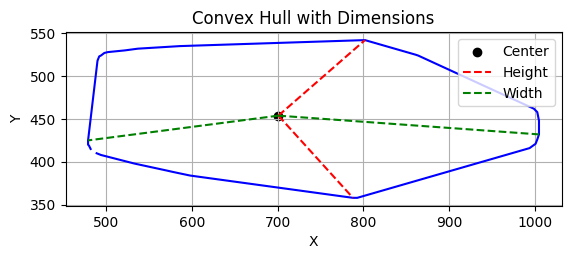

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_length_and_width(rotated_hull):
    # Get the coordinates of the hull vertices
    vertices = rotated_hull.reshape(-1, 2)

    # Calculate the distances between each vertex and the center
    center = np.mean(vertices, axis=0)
    distances = np.linalg.norm(vertices - center, axis=1)

    # Find the indices of the vertices with maximum distances in both horizontal and vertical directions
    top_index = np.argmax(vertices[:, 1])
    bottom_index = np.argmin(vertices[:, 1])
    right_index = np.argmax(vertices[:, 0])
    left_index = np.argmin(vertices[:, 0])

    # Calculate the width and height based on the distances
    width = distances[left_index] + distances[right_index]
    height = distances[top_index] + distances[bottom_index]

    return width, height, vertices, distances

def plot_hull_with_dimensions(rotated_hull, width, height, vertices, distances):
    # Plot the convex hull
    plt.plot(rotated_hull[:, 0], rotated_hull[:, 1], c='blue')

    # Plot the center of the convex hull
    center = np.mean(vertices, axis=0)
    plt.scatter(center[0], center[1], c='black', marker='o', label='Center')

    # Find the vertices with maximum distances in both horizontal and vertical directions
    top_index = np.argmax(vertices[:, 1])
    bottom_index = np.argmin(vertices[:, 1])
    right_index = np.argmax(vertices[:, 0])
    left_index = np.argmin(vertices[:, 0])

    # Plot lines from top to bottom and from right to left, meeting at the vertices with maximum distances
    plt.plot([center[0], vertices[top_index][0]], [center[1], vertices[top_index][1]], c='red', linestyle='--', label='Height')
    plt.plot([center[0], vertices[bottom_index][0]], [center[1], vertices[bottom_index][1]], c='red', linestyle='--')
    plt.plot([center[0], vertices[right_index][0]], [center[1], vertices[right_index][1]], c='green', linestyle='--', label='Width')
    plt.plot([center[0], vertices[left_index][0]], [center[1], vertices[left_index][1]], c='green', linestyle='--')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull with Dimensions')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
width, height, vertices, distances = find_length_and_width(rotated_hull)
plot_hull_with_dimensions(rotated_hull, width, height, vertices, distances)

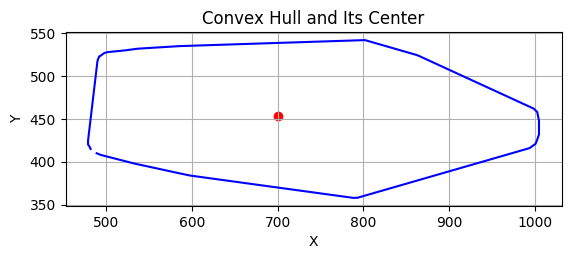

In [23]:
# Plot the rotated convex hull and its center
plot_hull_and_center(rotated_hull, center)

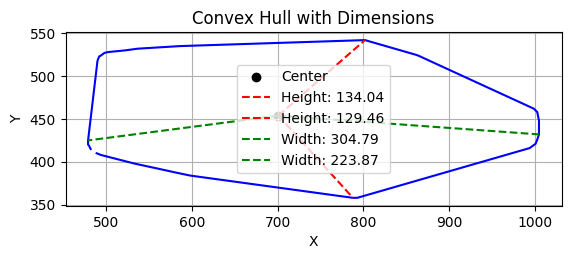

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_length_and_width(rotated_hull):
    # Get the coordinates of the hull vertices
    vertices = rotated_hull.reshape(-1, 2)

    # Calculate the distances between each vertex and the center
    center = np.mean(vertices, axis=0)
    distances = np.linalg.norm(vertices - center, axis=1)

    # Find the indices of the vertices with maximum distances in both horizontal and vertical directions
    top_index = np.argmax(vertices[:, 1])
    bottom_index = np.argmin(vertices[:, 1])
    right_index = np.argmax(vertices[:, 0])
    left_index = np.argmin(vertices[:, 0])

    # Calculate the width and height based on the distances
    width = distances[left_index] + distances[right_index]
    height = distances[top_index] + distances[bottom_index]

    return width, height, vertices, distances

def plot_hull_with_dimensions(rotated_hull, width, height, vertices, distances):
    # Plot the convex hull
    plt.plot(rotated_hull[:, 0], rotated_hull[:, 1], c='blue')

    # Plot the center of the convex hull
    center = np.mean(vertices, axis=0)
    plt.scatter(center[0], center[1], c='black', marker='o', label='Center')

    # Find the vertices with maximum distances in both horizontal and vertical directions
    top_index = np.argmax(vertices[:, 1])
    bottom_index = np.argmin(vertices[:, 1])
    right_index = np.argmax(vertices[:, 0])
    left_index = np.argmin(vertices[:, 0])

    # Plot lines from top to bottom and from right to left, meeting at the vertices with maximum distances
    plt.plot([center[0], vertices[top_index][0]], [center[1], vertices[top_index][1]], c='red', linestyle='--', label=f'Height: {distances[top_index]:.2f}')
    plt.plot([center[0], vertices[bottom_index][0]], [center[1], vertices[bottom_index][1]], c='red', linestyle='--', label=f'Height: {distances[bottom_index]:.2f}')
    plt.plot([center[0], vertices[right_index][0]], [center[1], vertices[right_index][1]], c='green', linestyle='--', label=f'Width: {distances[right_index]:.2f}')
    plt.plot([center[0], vertices[left_index][0]], [center[1], vertices[left_index][1]], c='green', linestyle='--', label=f'Width: {distances[left_index]:.2f}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull with Dimensions')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
width, height, vertices, distances = find_length_and_width(rotated_hull)
plot_hull_with_dimensions(rotated_hull, width, height, vertices, distances)

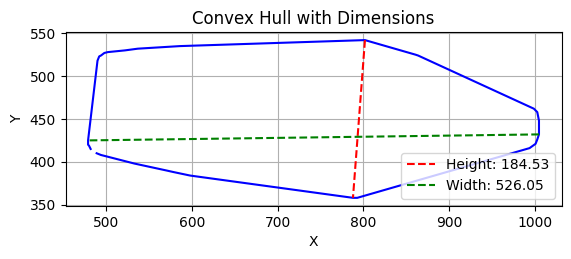

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_length_and_width(rotated_hull):
    # Get the coordinates of the hull vertices
    vertices = rotated_hull.reshape(-1, 2)

    # Find the indices of the vertices with maximum distances in both horizontal and vertical directions
    top_index = np.argmax(vertices[:, 1])
    bottom_index = np.argmin(vertices[:, 1])
    right_index = np.argmax(vertices[:, 0])
    left_index = np.argmin(vertices[:, 0])

    # Calculate the distances between the vertices
    width = np.linalg.norm(vertices[left_index] - vertices[right_index])
    height = np.linalg.norm(vertices[top_index] - vertices[bottom_index])

    return width, height, vertices

def plot_hull_with_dimensions(rotated_hull, width, height, vertices):
    # Plot the convex hull
    plt.plot(rotated_hull[:, 0], rotated_hull[:, 1], c='blue')

    # Find the vertices with maximum distances in both horizontal and vertical directions
    top_index = np.argmax(vertices[:, 1])
    bottom_index = np.argmin(vertices[:, 1])
    right_index = np.argmax(vertices[:, 0])
    left_index = np.argmin(vertices[:, 0])

    # Plot lines from top to bottom and from right to left, meeting at the vertices with maximum distances
    plt.plot([vertices[top_index][0], vertices[bottom_index][0]], [vertices[top_index][1], vertices[bottom_index][1]], c='red', linestyle='--', label=f'Height: {height:.2f}')
    plt.plot([vertices[right_index][0], vertices[left_index][0]], [vertices[right_index][1], vertices[left_index][1]], c='green', linestyle='--', label=f'Width: {width:.2f}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull with Dimensions')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
width, height, vertices = find_length_and_width(rotated_hull)
plot_hull_with_dimensions(rotated_hull, width, height, vertices)

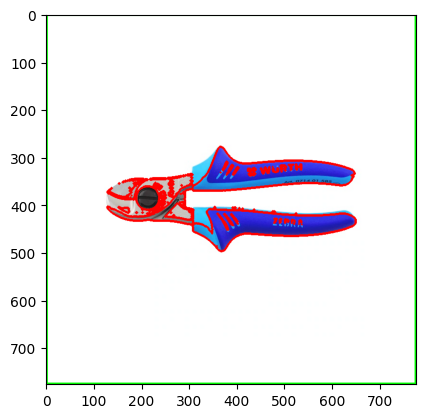

In [181]:
plt.imshow(contour_img)

In [166]:
# Convert the raw image to grayscale
grey = cv2.cvtColor(raw_image, cv2.COLOR_BGRA2GRAY)

# Calculate the threshold value using Otsu's method
_, thresholded = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# If you want to manually adjust the threshold value to include more pixels,
# you can set a lower threshold value manually, for example:
threshold_value = 100  # Adjust this value as needed
_, thresholded = cv2.threshold(grey, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

### Contours over blank image

In [167]:
biggest_contour.shape

(3100, 1, 2)

### Canny Edge Detector

Number of Contours found = 45


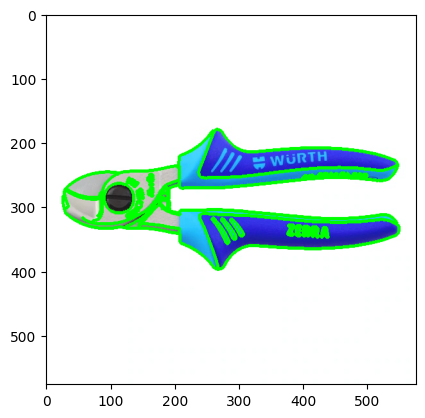

In [258]:
image = cv2.imread(image_path)
#image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(255, 255, 255))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray, (2,2))
  
# Find Canny edges 
edged = cv2.Canny(gray, 10, 200)
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
plt.imshow(edged)
#cv2.imshow('Canny Edges After Contouring', edged) 
  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
plt.imshow(image)

In [124]:
# set empirical boundaries for the areas that the detected objects should have (to filter out wrong detections)
object_area_max = int(binary_image.shape[0] * binary_image.shape[1] * 0.8)  # TODO to manage better this thresholds
object_area_min = int(binary_image.shape[0] * binary_image.shape[1] * 0.001)
print(f"object_area_min = {object_area_min}, object_area_max = {object_area_max}")
if binary_image.dtype == np.uint16:
    binary_image = np.uint8(binary_image)
    
# Find Contours
print(f"length of contours = {len(contours)}")

object_area_min = 331, object_area_max = 265420
length of contours = 38


In [ ]:
try:
    # Select the biggest contour within areas thresholds
    object_contour = select_contour_with_allowed_area(contours, contour_area_max=object_area_max,
                                                          contour_area_min=object_area_min)
except ValueError as ContourNotSelected:
    print("The algorithm could not select one contour among those detected.")
    
plt.title("Selected Contour")
drawing_0 = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
cv2.drawContours(drawing_0, [object_contour], 0, (255, 255, 0), 10)
plt.imshow(drawing_0)

In [128]:
drawing_0.min(), drawing_0.max()

(0, 0)

drawing_null.shape = (776, 776, 3)
[array([[[531, 431]],

       [[531, 432]],

       [[530, 433]],

       [[530, 434]],

       [[530, 435]],

       [[530, 436]],

       [[529, 437]],

       [[529, 438]],

       [[529, 439]],

       [[529, 440]],

       [[528, 441]],

       [[528, 442]],

       [[528, 443]],

       [[528, 444]],

       [[527, 445]],

       [[528, 446]],

       [[529, 446]],

       [[530, 446]],

       [[530, 445]],

       [[530, 444]],

       [[531, 443]],

       [[531, 442]],

       [[531, 441]],

       [[532, 440]],

       [[532, 439]],

       [[532, 438]],

       [[532, 437]],

       [[532, 436]],

       [[533, 435]],

       [[534, 436]],

       [[534, 437]],

       [[534, 438]],

       [[534, 439]],

       [[534, 440]],

       [[535, 441]],

       [[534, 442]],

       [[534, 443]],

       [[534, 444]],

       [[534, 445]],

       [[535, 446]],

       [[536, 447]],

       [[537, 447]],

       [[538, 447]],

       [[538, 446]

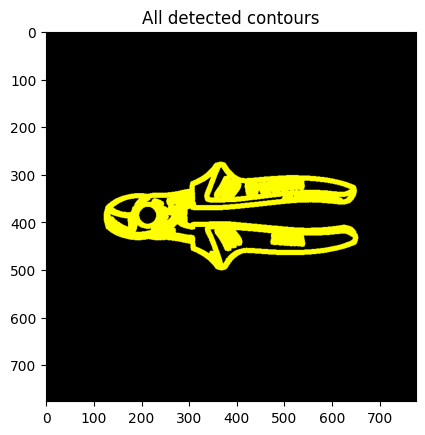

In [184]:
empty_img = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
print(f"drawing_null.shape = {empty_img.shape}")

plt.title("All detected contours")
for c in contours:
    print([c])
    cv2.drawContours(empty_img, [c], 0, (255, 255, 0), 10)
plt.imshow(empty_img)
plt.show()

In [185]:
len(contours)

69

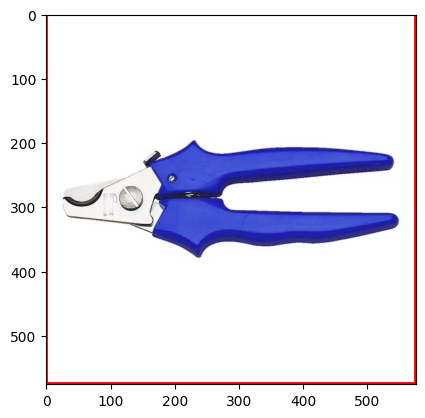

In [108]:
contours_img = cv2.drawContours(img, biggest_contour, -1, 255, 3)
plt.imshow(contours_img)

### Filtering the masks

In [132]:
object_area_max = int(binary_image.shape[0] * binary_image.shape[1] * 0.8)  # TODO to manage better this thresholds
object_area_min = int(binary_image.shape[0] * binary_image.shape[1] * 0.001)
contour_area_min = object_area_min
contour_area_max = object_area_max

object_area_min, object_area_max, int(binary_image.shape[0] * binary_image.shape[1])

(331, 265420, 331776)

In [ ]:
contours_areas = np.array([cv2.contourArea(c) for c in contours])
for c in contours_areas:
    print(c)

In [206]:
def merge_contours(contours, max_neighbor_distance=50):
    merged_contours = []

    for contour in contours:
        merged = False
        for merged_contour in merged_contours:
            # Convert contours to NumPy arrays
            contour_np = np.array(contour)
            merged_contour_np = np.array(merged_contour[0])

            # Calculate the shape matching score using cv2.matchShapes()
            shape_match_score = cv2.matchShapes(contour_np, merged_contour_np, cv2.CONTOURS_MATCH_I1, 0.0)

            if shape_match_score < 0.1:  # Adjust this threshold as needed
                # Merge the contours if their shapes are similar
                merged_contour[0] = np.concatenate((merged_contour[0], contour_np))
                merged = True
                break

        if not merged:
            merged_contours.append([np.array(contour)])

    return merged_contours

In [207]:
merged_contours = merge_contours(contours)

In [210]:
len(contours)

69

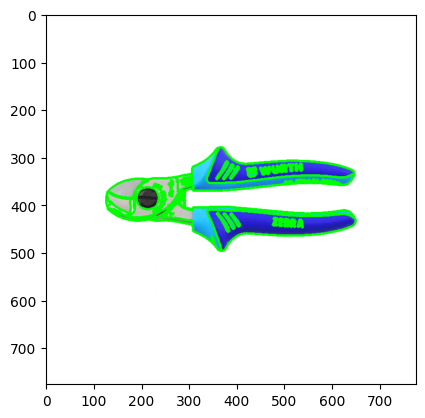

In [212]:
plt.imshow(image)

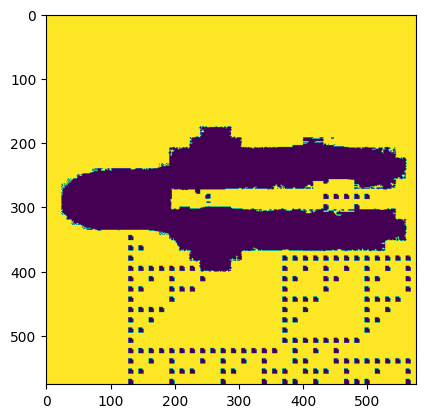

In [248]:
# Get mask for floodfill
canny = image.copy()
h, w = canny.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(canny, mask, (0,0), 123)
canny = cv2.inRange(canny, 115, 255)
plt.imshow(canny)

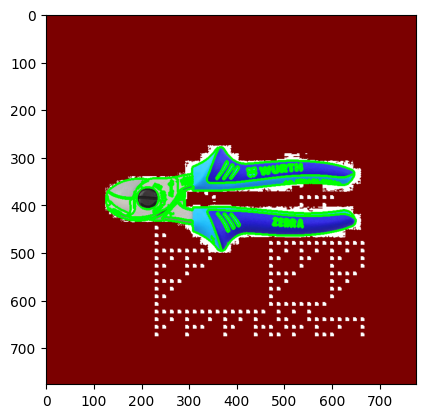

In [249]:
def create_global_convex_hull(contours, image_shape):
    # Create a blank mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Concatenate all contour points into a single array
    all_points = np.concatenate(contours)

    # Calculate the convex hull of all points
    hull = cv2.convexHull(all_points)

    # Draw the convex hull on the mask
    cv2.drawContours(mask, [hull], 0, (255), cv2.FILLED)

    return mask

convex_hull_mask = create_global_convex_hull(contours, image.shape[:2])

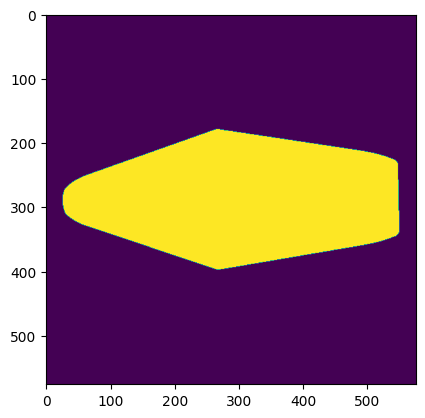

In [264]:
plt.imshow(convex_hull_mask)

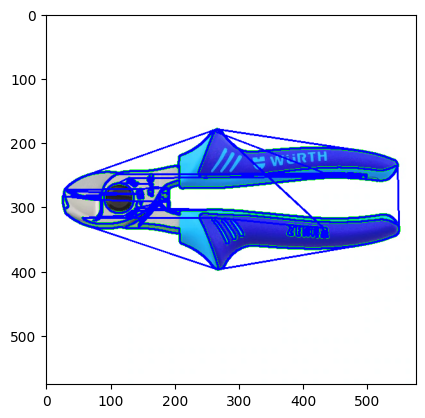

In [265]:
temp_img = image.copy()
contours_combined = np.vstack(contours)
cv2.drawContours(temp_img, [contours_combined], -1, (0,0,255), 2)
hull = cv2.convexHull(contours_combined)
cv2.polylines(temp_img, [hull], True, (0,0,255), 2)
plt.imshow(temp_img)

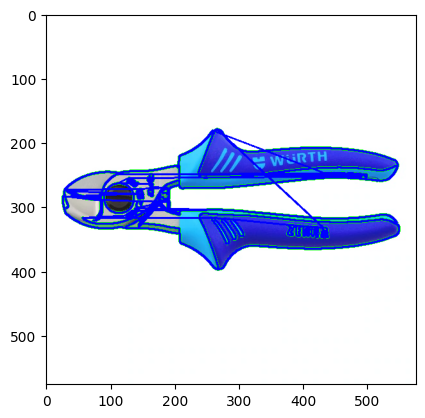

In [271]:
img_temp = image.copy()
contours_combined = np.vstack(contours)
#contours_combined = sorted(contours_combined, key=cv2.contourArea, reverse=True)
cv2.drawContours(img_temp, np.array([contours_combined]), -1, (0,0,255), 2)
plt.imshow(img_temp)

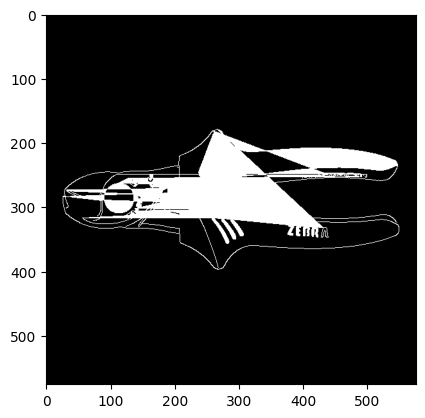

In [269]:
filled_image = np.zeros_like(image)
contours_combined = sorted(contours_combined, key=cv2.contourArea, reverse=True)

# Draw the filled contour on the blank image
cv2.drawContours(filled_image, np.array([contours_combined]), 0, (255, 255, 255), thickness=cv2.FILLED)
plt.imshow(filled_image)

In [263]:
contours_combined

[array([[431, 332]], dtype=int32),
 array([[431, 333]], dtype=int32),
 array([[431, 334]], dtype=int32),
 array([[430, 335]], dtype=int32),
 array([[430, 336]], dtype=int32),
 array([[430, 337]], dtype=int32),
 array([[430, 338]], dtype=int32),
 array([[429, 339]], dtype=int32),
 array([[429, 340]], dtype=int32),
 array([[429, 341]], dtype=int32),
 array([[429, 342]], dtype=int32),
 array([[429, 343]], dtype=int32),
 array([[428, 344]], dtype=int32),
 array([[428, 345]], dtype=int32),
 array([[428, 346]], dtype=int32),
 array([[428, 347]], dtype=int32),
 array([[429, 347]], dtype=int32),
 array([[430, 347]], dtype=int32),
 array([[431, 346]], dtype=int32),
 array([[431, 345]], dtype=int32),
 array([[431, 344]], dtype=int32),
 array([[431, 343]], dtype=int32),
 array([[432, 342]], dtype=int32),
 array([[432, 341]], dtype=int32),
 array([[432, 340]], dtype=int32),
 array([[432, 339]], dtype=int32),
 array([[433, 338]], dtype=int32),
 array([[433, 337]], dtype=int32),
 array([[433, 336]],

In [256]:
def find_y_corners(contours):
    top_left_corners = []
    top_right_corners = []
    lower_corners = []

    for contour in contours:
        contour = contour.squeeze()  # Remove the singleton dimension
        if len(contour) < 3:
            # Contour too small to be meaningful
            continue

        # Get the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Split the contour into upper and lower parts
        upper_contour = contour[contour[:, 1] < y + h / 2]
        lower_contour = contour[contour[:, 1] >= y + h / 2]
        
        print("Upper Contour:", upper_contour)
        print("Lower Contour:", lower_contour)

        if len(upper_contour) < 3 or len(lower_contour) < 3:
            # Not enough points to form upper and lower parts
            continue

        # Find the extreme points of upper and lower contours
        upper_leftmost = tuple(upper_contour[upper_contour[:, 0].argmin()])
        upper_rightmost = tuple(upper_contour[upper_contour[:, 0].argmax()])
        lower_leftmost = tuple(lower_contour[lower_contour[:, 0].argmin()])
        lower_rightmost = tuple(lower_contour[lower_contour[:, 0].argmax()])
        
        print("Upper Leftmost:", upper_leftmost)
        print("Upper Rightmost:", upper_rightmost)
        print("Lower Leftmost:", lower_leftmost)
        print("Lower Rightmost:", lower_rightmost)

        # Determine the top two corners and the lower corner
        top_left_corner = upper_leftmost if upper_leftmost[1] < lower_leftmost[1] else lower_leftmost
        top_right_corner = upper_rightmost if upper_rightmost[1] < lower_rightmost[1] else lower_rightmost
        lower_corner = lower_leftmost if lower_leftmost[1] > lower_rightmost[1] else lower_rightmost
        
        # Append the corners to the respective lists
        top_left_corners.append(top_left_corner)
        top_right_corners.append(top_right_corner)
        lower_corners.append(lower_corner)
    
    return top_left_corners, top_right_corners, lower_corners

# Find the corners of the letter "Y"
top_left_corner, top_right_corner, lower_corner = find_y_corners(contours_combined)

# Print the coordinates of the top two corners and lower corner
print("Top Left Corner:", top_left_corner)
print("Top Right Corner:", top_right_corner)
print("Lower Corner:", lower_corner)

Top Left Corner: []
Top Right Corner: []
Lower Corner: []


In [254]:
contours_combined.shape

(7482, 1, 2)

In [287]:
import cv2
import numpy as np

def find_more_convex_side(contour):
    # Compute convex hull of the contour
    hull = cv2.convexHull(contour, returnPoints=False)

    # Compute convexity defects
    defects = cv2.convexityDefects(contour, hull)

    # Initialize counts for left and right sides
    left_count = right_count = 0
    
    # Initialize flags to indicate if significant convexity defects are found on both sides
    left_convex = right_convex = False

    if defects is not None:
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            start = tuple(contour[s][0])
            end = tuple(contour[e][0])
            far = tuple(contour[f][0])
            # Calculate the distance between start and end points
            length = np.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
            # Calculate the depth of the convexity defect
            depth = d / 256.0
            # If the depth is significant compared to the length, consider it a convexity
            if depth > 0.1 * length:
                # Check if the defect is on the left or right side of the contour
                if far[0] < (start[0] + end[0]) / 2:
                    left_count += 1
                    left_convex = True
                else:
                    right_count += 1
                    right_convex = True

    # Check if at least one side is convex
    if left_convex and right_convex:
        # Determine which side has more convexity
        if left_count > right_count:
            return "Left"
        elif right_count > left_count:
            return "Right"
        else:
            return "Equal"
    elif left_convex:
        return "Left"
    elif right_convex:
        return "Right"
    else:
        return "None"

# Example usage:
more_convex_side = find_more_convex_side(hull)
print("More convex side:", more_convex_side)

More convex side: None


In [274]:
hull.shape

(39, 1, 2)

In [289]:
def find_object_dimensions(hull):
    # Compute the bounding rectangle of the convex hull
    x, y, w, h = cv2.boundingRect(hull)

    # Determine the orientation of the bounding rectangle
    if w > h:
        # Horizontal orientation (width > height)
        sides = {
            "left": x,
            "right": x + w,
            "top": y,
            "bottom": y + h
        }
        width = w
        height = h
    else:
        # Vertical orientation (width <= height)
        sides = {
            "left": x,
            "right": x + h,
            "top": y,
            "bottom": y + w
        }
        width = h
        height = w

    return width, height, sides

object_width, object_height, side_sizes = find_object_dimensions(hull)

print("Object width:", object_width)
print("Object height:", object_height)
print("Side sizes:", side_sizes)

Object width: 524
Object height: 219
Side sizes: {'left': 26, 'right': 550, 'top': 179, 'bottom': 398}


In [290]:
def find_convex_concave_sides(contour):
    # Compute the convex hull of the contour
    hull = cv2.convexHull(contour, returnPoints=False)

    # Compute convexity defects
    defects = cv2.convexityDefects(contour, hull)

    # Initialize flags to indicate convex and concave sides
    convex_side = concave_side = None

    if defects is not None:
        # Analyze convexity defects to determine convex and concave sides
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            start = tuple(contour[s][0])
            end = tuple(contour[e][0])
            far = tuple(contour[f][0])

            # Check if the defect is on the left or right side of the contour
            if far[0] < (start[0] + end[0]) / 2:
                # Convexity defect found on the left side
                convex_side = "left"
            else:
                # Convexity defect found on the right side
                convex_side = "right"

    # Determine the concave side based on the convex side
    if convex_side == "left":
        concave_side = "right"
    elif convex_side == "right":
        concave_side = "left"

    return convex_side, concave_side


convex_side, concave_side = find_convex_concave_sides(hull)

print("Convex side of the width:", convex_side)
print("Concave or straight side of the width:", concave_side)

Convex side of the width: None
Concave or straight side of the width: None


In [13]:
cx, cy = find_hull_center(hull)

# Plot the convex hull and its center
plt.figure()
plt.plot(hull[:, 0, 0], hull[:, 0, 1], c='blue')  # Plot convex hull
plt.scatter(cx, cy, c='red', marker='o')         # Plot center of convex hull
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull and Its Center')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

NameError: name 'find_hull_center' is not defined

In [13]:
# Example usage:
leftmost, rightmost, topmost = find_hull_corners(hull)

plt.figure()
plt.plot(hull[:, 0, 0], hull[:, 0, 1], c='blue')  # Plot convex hull
plt.scatter(*leftmost, c='red', marker='o', label='Leftmost')   # Plot leftmost corner
plt.scatter(*rightmost, c='green', marker='o', label='Rightmost')  # Plot rightmost corner
plt.scatter(*topmost, c='orange', marker='o', label='Topmost')  # Plot topmost corner
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull and Its Corners')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'find_hull_corners' is not defined

In [12]:
leftmost, rightmost, topmost = find_hull_corners(hull)

# Calculate the center of the hull
center_x = int(np.mean(hull[:, :, 0]))
center_y = int(np.mean(hull[:, :, 1]))
center = (center_x, center_y)

# Plot the convex hull and its corners
plt.figure()
plt.plot(hull[:, 0, 0], hull[:, 0, 1], c='blue')  # Plot convex hull
plt.scatter(*leftmost, c='red', marker='o', label='Leftmost')   # Plot leftmost corner
plt.scatter(*rightmost, c='green', marker='o', label='Rightmost')  # Plot rightmost corner
plt.scatter(*topmost, c='orange', marker='o', label='Topmost')  # Plot topmost corner

# Draw lines from center to corners and annotate with angle values
for corner, label in zip([leftmost, rightmost, topmost], ['Left', 'Right', 'Top']):
    plt.plot([center[0], corner[0]], [center[1], corner[1]], linestyle='--', color='gray')  # Draw line
    angle_deg = calculate_angle(center, corner)
    plt.text(corner[0], corner[1], f'{angle_deg:.1f}°', fontsize=8, ha='center', va='bottom')  # Annotate angle value

plt.scatter(*center, c='black', marker='x', label='Center')  # Plot center of the hull
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull Corners and Angles')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'find_hull_corners' is not defined

In [299]:
def find_hull_corners(hull):
    # Get extreme points (corners) of the convex hull
    leftmost = tuple(hull[hull[:, :, 0].argmin()][0])
    rightmost = tuple(hull[hull[:, :, 0].argmax()][0])
    topmost = tuple(hull[hull[:, :, 1].argmin()][0])
    return leftmost, rightmost, topmost

def calculate_angle(center, corner):
    # Calculate the angle between the line joining center and corner with horizontal axis
    angle_rad = np.arctan2(corner[1] - center[1], corner[0] - center[0])
    angle_deg = np.degrees(angle_rad)
    return angle_deg

def classify_angle(angle):
    # Classify angle as flat or increasing positive value
    if angle >= 90:
        return 180 - angle
    else:
        return 180 - angle


leftmost, rightmost, topmost = find_hull_corners(hull)

# Calculate the center of the hull
center_x = int(np.mean(hull[:, :, 0]))
center_y = int(np.mean(hull[:, :, 1]))
center = (center_x, center_y)

# Define reference direction (horizontal axis)
reference_angle = 0

# Calculate angles from center to corners
angles = [calculate_angle(center, corner) - reference_angle for corner in [leftmost, rightmost, topmost]]

# Classify angles as flat or increasing positive value
angle_classifications = [classify_angle(angle) for angle in angles]

print("Angle classifications:", angle_classifications)

Angle classifications: [0.23103011689548225, 170.90972307917767, 274.47489650624607]


##### The left side is the head of the plier.